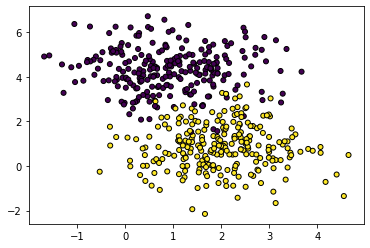

In [123]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [138]:
class LogisticRegression:
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.w = 0

  def scale_data(self) :
    scaler = StandardScaler()
    self.X = scaler.fit_transform(self.X)

  def splitter(self, test_size):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size)

  def add_intercept(self) :
     intercept = np.ones((self.X_train.shape[0], 1))
     self.X_train = np.concatenate((intercept, self.X_train), axis = 1)
     intercept = np.ones((self.X_test.shape[0], 1))
     self.X_test = np.concatenate((intercept, self.X_test), axis = 1)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def h_theta(self, x, w):
    return self.sigmoid(x @ w)

  def gradient(self, X, y, w) :
    m = X.shape[0]
    h = self.h_theta(X, w)
    error = h - y
    cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return cost, grad

  def plot_cost(self) :
      x = np.arange(self.iter)
      plt.plot(x, self.cost_per_iter, color='b')
      plt.xlabel('iterations')
      plt.ylabel('cost')
      plt.show()

  def output(self) :
        return np.round(self.h_theta(self.X_test, self.w))

  def mini_batch_GD(self, X, y, max_iter):
    w = np.zeros(X.shape[1])
    cost_per_iter = []
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) 
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = self.gradient(batch_X, batch_y, w)
        cost_per_iter.append(cost)
        w = w - l_rate * grad
    self.cost_per_iter = cost_per_iter
    self.iter = max_iter
    self.w = w
  


In [139]:
class classification_repor :
  def __init__(self, y, y_pred) :
    self.y = y 
    self.y_pred = y_pred
    self.shape = y.shape[0]
    tp = 0
    tn = 0
    fp = 0
    fn = 0 
    for k in range(self.shape) :
      if y[k] == 1 and y_pred[k] == 1 :
        tp += 1
      elif y[k] == 1 and y_pred[k] == 0 :
        fn += 1
      elif y[k] == 0 and y_pred[k] == 0 :
        tn += 1
      else :
        fp += 1
    self.tp = tp
    self.tn = tn 
    self.fp = fp
    self.fn = fn
  def accuracy(self) :
    return (self.tp + self.tn) / self.shape
  def precision(self) :
    return self.tp / (self.tp + self.fp)
  def recall(self) :
    return self.tp / (self.tp + self.fn) 
  def f1_score(self) :
    prec = self.precision()
    rec = self.recall()
    return 2 * prec*rec / (prec + rec)


In [140]:
exp = LogisticRegression(X, y)
print(exp.X.shape)
print(exp.y.shape)

(500, 2)
(500,)


In [141]:
exp.scale_data()
exp.splitter(test_size = 0.3)
exp.add_intercept()
exp.mini_batch_GD(exp.X_train, exp.y_train, 2000)
y_pred = exp.output()

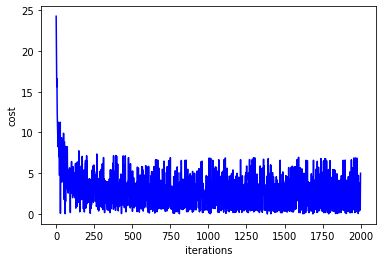

In [142]:
exp.plot_cost()

In [143]:
classif_report = classification_repor(exp.y_test, y_pred)
print('Accuracy : ', classif_report.accuracy())
print('Precision : ', classif_report.precision())
print('Recall : ', classif_report.recall())
print('F1 score : ', classif_report.f1_score())

Accuracy :  0.9533333333333334
Precision :  0.96
Recall :  0.9473684210526315
F1 score :  0.9536423841059603


According to the results, we can see that we got an accurate binary logistic regression model of the dataset.